 <div style="text-align: center; background-color: #D4AF37; font-family: 'Trebuchet MS', Arial, sans-serif; color:white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 10px 10px 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">Compensation Project
</div>
<p style="text-align: center;">



<div style="border-radius: 10px; border: #b09507 solid; padding: 10px; background-color:white; font-size: 120%; text-align: left;">

 <b><span style='color:#fa762f'> </span><span style='color:#00B0F0'> About the Project</span></b>



Managing compensation is a complex endeavor that covers multiple facets including salaries, wages, bonuses, benefits, and additional incentives given to employees for their work. It involves navigating a delicate balance between budget constraints and providing fair rewards to employees.
In the practical scenario of our dummy data project, we address similar elements. This entails a fictional organization handling compensation management across various outlined factors. I've utilized Pandas to analyse data.


<div style="border-radius: 10px; border: #b09507 solid; padding: 10px; background-color:white; font-size: 120%; text-align: left;">

 <b><span style='color:#fa762f'> </span><span style='color:#00B0F0'> About the Dataset</span></b>

The dataset comprises fabricated data pertaining to a company named Cityla. Among the three projects undertaken by the company, the Venice project surpassed expectations, the Tokyo project met expectations, and the Gemcom project yielded results below expectations.  
    
Based on the outcomes, the organization developed monetary rewards, such as regular bonuses, additional bonuses, and revised base pay.
    
Project Venice (Exceeded Expectations)
    
•	Employees (3 OR ABOVE years in the company):
    
Bonus: Regular bonus (10% for Grade A/B, 15% for C/D) + 50k additional bonus (paid in full).
    
o	Hike:
    
	Below 50th percentile: 18% hike.
	Above 50th percentile: 12% hike.
    
•	Employees (2-3 years in the company):
    
o	Bonus: Regular bonus (prorated for those joined after April 1, 2023)+ 25K
    
•	Employees (Below Rating 7):
    
o	Regular Bonus: 50% bonus (paid in full).
o	Hike: 5%
    
Project Tokyo (Met Expectations)
    
•	Employees (3 OR ABOVE years in the company):
    
o	Bonus: Regular bonus (10% for Grade A/B, 15% for C/D) + 20k additional bonus (paid in full).
    
o	Hike:
    
	Below 50th percentile: 12% hike.
	Above 50th percentile: 10% hike.
    
•	Employees (2-3 years in the company):
    
Bonus: Regular bonus (prorated for those joined after April 1, 2023)+10K
    
•	Employees (Below Rating 7):
    
Regular Bonus: 50% bonus (paid in full).
Hike: 5%
 
(if joined after April 1, 2023): Prorated hike and bonus.
    
    
Project Gemcom (Below Expectations)- 5% Hike. 50% Bonus for all. no additional bonus.
    

    
Note:
    
•	Regular bonus percentages are based on employee grade.
    
•	Joining after April 1, 2023 impacts bonus and hike calculations (prorated).


   

In [1]:
#Import the Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('Cityla.csv', parse_dates=['Start_Date'])

In [3]:
df.head()

,Start_Year,Start_Date,Employee_Name,unique_ID,Level_ID,Grade,Project,Current_Base_Pay,Bonus_entitlement,Rating
0,2019,2019-01-07,S.Kumar,1,4,Lead Engineer,Gemcon,3219629,0.15,10
1,2019,2019-01-14,A. Swati,2,3,Senior Software Engineer,Tokyo,2530100,0.15,7
2,2019,2019-01-14,C. Poornima,3,4,Lead Engineer,Gemcon,3330113,0.15,10
3,2019,2019-01-21,D. Manish,4,2,Software Engineer,Gemcon,2767233,0.10,10
4,2019,2019-01-21,R. Manoj,5,2,Software Engineer,Gemcon,2023602,0.10,8


In [4]:
table= pd.DataFrame({'unique':df.nunique(),
                   'Null':df.isnull().sum(),
                   'Nullpercent':df.isnull().sum()/len(df)*100,
                   'type':df.dtypes, "duplicated":df.duplicated().sum()})
table

,unique,Null,Nullpercent,type,duplicated
Start_Year,5,0,0.0,int64,0
Start_Date,148,0,0.0,datetime64[ns],0
Employee_Name,556,0,0.0,object,0
unique_ID,561,0,0.0,int64,0
Level_ID,4,0,0.0,int64,0
Grade,4,0,0.0,object,0
Project,3,0,0.0,object,0
Current_Base_Pay,535,0,0.0,int64,0
Bonus_entitlement,2,0,0.0,float64,0
Rating,5,0,0.0,int64,0


In [5]:
df['unique_ID']=df['unique_ID'].astype(object)

How many employees are there in the records?

In [6]:
df.shape

(561, 10)

561 records include

Employees by Grade

In [7]:
df['Grade'].value_counts()

Software Engineer           190
Senior Software Engineer    164
Associate                   122
Lead Engineer                85
Name: Grade, dtype: int64

Employees joined by Year and still with the company

In [8]:
df['Start_Year'].value_counts()

2020    163
2023    132
2021    106
2022    104
2019     56
Name: Start_Year, dtype: int64

employee project allocation & grade

In [9]:
pivot_project_grade = df.pivot_table(index='Grade', columns='Project', values='unique_ID',aggfunc='count')

In [10]:
pivot_project_grade

Project,Gemcon,Tokyo,Venice
Grade,,,
Associate,49,30,43
Lead Engineer,33,25,27
Senior Software Engineer,43,61,60
Software Engineer,71,56,63


In [11]:
pivot_project_grade

Project,Gemcon,Tokyo,Venice
Grade,,,
Associate,49,30,43
Lead Engineer,33,25,27
Senior Software Engineer,43,61,60
Software Engineer,71,56,63


Avg Ratings across project

In [12]:
pivot_project_rating = df.pivot_table(index ='Grade', columns ='Project',values = 'Rating',aggfunc='mean')
pivot_project_rating = pivot_project_rating.round(2)

In [13]:
pivot_project_rating

Project,Gemcon,Tokyo,Venice
Grade,,,
Associate,7.96,8.57,7.88
Lead Engineer,8.27,8.00,7.89
Senior Software Engineer,7.74,8.03,7.93
Software Engineer,7.96,7.77,7.98


Average Base Pay Across Projects

In [14]:
pivot_project_Base = df.pivot_table(index ='Grade', columns ='Project',values = 'Current_Base_Pay',aggfunc='mean')
pivot_project_Base = pivot_project_Base.round(0)
pivot_project_Base

Project,Gemcon,Tokyo,Venice
Grade,,,
Associate,1488618.0,1489989.0,1523179.0
Lead Engineer,2766288.0,2535402.0,2858086.0
Senior Software Engineer,2378832.0,2421193.0,2417559.0
Software Engineer,2127771.0,2052550.0,2076845.0


In [15]:
df.head(2)

,Start_Year,Start_Date,Employee_Name,unique_ID,Level_ID,Grade,Project,Current_Base_Pay,Bonus_entitlement,Rating
0,2019,2019-01-07,S.Kumar,1,4,Lead Engineer,Gemcon,3219629,0.15,10
1,2019,2019-01-14,A. Swati,2,3,Senior Software Engineer,Tokyo,2530100,0.15,7


In [16]:
 # Calculate quartiles
quartiles = df.groupby('Grade')['Current_Base_Pay'].transform(lambda x: pd.qcut(x, q=[0, 0.25, 0.5, 0.75, 1], labels=False))

# Assign percentile categories based on quartiles
percentile_category = quartiles.apply(lambda x: {
    0: 'Below 25th',
    1: 'Between 25th to 50th',
    2: 'Between 50th to 75th',
    3: 'Above 75th'
}[x])

# Add new column for percentile category
df['percentile_category'] = percentile_category
df

,Start_Year,Start_Date,Employee_Name,unique_ID,Level_ID,Grade,Project,Current_Base_Pay,Bonus_entitlement,Rating,percentile_category
0,2019,2019-01-07,S.Kumar,1,4,Lead Engineer,Gemcon,3219629,0.15,10,Above 75th
1,2019,2019-01-14,A. Swati,2,3,Senior Software Engineer,Tokyo,2530100,0.15,7,Between 50th to 75th
2,2019,2019-01-14,C. Poornima,3,4,Lead Engineer,Gemcon,3330113,0.15,10,Above 75th
3,2019,2019-01-21,D. Manish,4,2,Software Engineer,Gemcon,2767233,0.10,10,Above 75th
4,2019,2019-01-21,R. Manoj,5,2,Software Engineer,Gemcon,2023602,0.10,8,Between 25th to 50th
...,...,...,...,...,...,...,...,...,...,...,...
556,2023,2023-08-21,K. Shreya,557,3,Senior Software Engineer,Gemcon,2697410,0.15,7,Above 75th
557,2023,2023-08-21,S. Mani,558,4,Lead Engineer,Tokyo,2467364,0.15,8,Between 25th to 50th
558,2023,2023-08-21,M. Bhavana,559,3,Senior Software Engineer,Tokyo,2397438,0.15,10,Between 25th to 50th
559,2023,2023-08-21,N. Naveen,560,1,Associate,Tokyo,1000000,0.10,9,Below 25th


In [17]:
df['Current_Base_Pay'].quantile(0.25)

1765745.0

In [18]:
pivot_project_percentile = df.pivot_table(index ='percentile_category', columns ='Project',values = 'unique_ID',aggfunc='count')
pivot_project_percentile = pivot_project_percentile.round(0)
pivot_project_percentile

Project,Gemcon,Tokyo,Venice
percentile_category,,,
Above 75th,46,36,59
Below 25th,47,48,47
Between 25th to 50th,54,40,45
Between 50th to 75th,49,48,42


In [19]:
df[df['unique_ID']==1]

,Start_Year,Start_Date,Employee_Name,unique_ID,Level_ID,Grade,Project,Current_Base_Pay,Bonus_entitlement,Rating,percentile_category
0,2019,2019-01-07,S.Kumar,1,4,Lead Engineer,Gemcon,3219629,0.15,10,Above 75th


In [20]:
# Define the reference date
reference_date = pd.to_datetime('2024-04-01')

# Calculate time delta in years
time_delta = (reference_date - df['Start_Date']).dt.days
years = time_delta // 365  # Calculate years
remaining_days = time_delta % 365  # Calculate remaining days
time_in_years = years + remaining_days / 365  # Combine years and remaining days as decimal

# Add the time delta in years to the DataFrame
df['Time_In_Company'] = time_in_years.round(2)
df['Time_In_Company'] = np.floor(time_in_years * 100) / 100  # Round to 2 decimal places
df

df['Prorated'] = df['Time_In_Company'].apply(lambda x: 1 if x > 1 else x)

In [21]:
df

,Start_Year,Start_Date,Employee_Name,unique_ID,Level_ID,Grade,Project,Current_Base_Pay,Bonus_entitlement,Rating,percentile_category,Time_In_Company,Prorated
0,2019,2019-01-07,S.Kumar,1,4,Lead Engineer,Gemcon,3219629,0.15,10,Above 75th,5.23,1.00
1,2019,2019-01-14,A. Swati,2,3,Senior Software Engineer,Tokyo,2530100,0.15,7,Between 50th to 75th,5.21,1.00
2,2019,2019-01-14,C. Poornima,3,4,Lead Engineer,Gemcon,3330113,0.15,10,Above 75th,5.21,1.00
3,2019,2019-01-21,D. Manish,4,2,Software Engineer,Gemcon,2767233,0.10,10,Above 75th,5.19,1.00
4,2019,2019-01-21,R. Manoj,5,2,Software Engineer,Gemcon,2023602,0.10,8,Between 25th to 50th,5.19,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,2023,2023-08-21,K. Shreya,557,3,Senior Software Engineer,Gemcon,2697410,0.15,7,Above 75th,0.61,0.61
557,2023,2023-08-21,S. Mani,558,4,Lead Engineer,Tokyo,2467364,0.15,8,Between 25th to 50th,0.61,0.61
558,2023,2023-08-21,M. Bhavana,559,3,Senior Software Engineer,Tokyo,2397438,0.15,10,Between 25th to 50th,0.61,0.61
559,2023,2023-08-21,N. Naveen,560,1,Associate,Tokyo,1000000,0.10,9,Below 25th,0.61,0.61


In [22]:
df

,Start_Year,Start_Date,Employee_Name,unique_ID,Level_ID,Grade,Project,Current_Base_Pay,Bonus_entitlement,Rating,percentile_category,Time_In_Company,Prorated
0,2019,2019-01-07,S.Kumar,1,4,Lead Engineer,Gemcon,3219629,0.15,10,Above 75th,5.23,1.00
1,2019,2019-01-14,A. Swati,2,3,Senior Software Engineer,Tokyo,2530100,0.15,7,Between 50th to 75th,5.21,1.00
2,2019,2019-01-14,C. Poornima,3,4,Lead Engineer,Gemcon,3330113,0.15,10,Above 75th,5.21,1.00
3,2019,2019-01-21,D. Manish,4,2,Software Engineer,Gemcon,2767233,0.10,10,Above 75th,5.19,1.00
4,2019,2019-01-21,R. Manoj,5,2,Software Engineer,Gemcon,2023602,0.10,8,Between 25th to 50th,5.19,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,2023,2023-08-21,K. Shreya,557,3,Senior Software Engineer,Gemcon,2697410,0.15,7,Above 75th,0.61,0.61
557,2023,2023-08-21,S. Mani,558,4,Lead Engineer,Tokyo,2467364,0.15,8,Between 25th to 50th,0.61,0.61
558,2023,2023-08-21,M. Bhavana,559,3,Senior Software Engineer,Tokyo,2397438,0.15,10,Between 25th to 50th,0.61,0.61
559,2023,2023-08-21,N. Naveen,560,1,Associate,Tokyo,1000000,0.10,9,Below 25th,0.61,0.61


In [23]:
df.columns

Index(['Start_Year', 'Start_Date', 'Employee_Name', 'unique_ID', 'Level_ID',
       'Grade', 'Project', 'Current_Base_Pay', 'Bonus_entitlement', 'Rating',
       'percentile_category', 'Time_In_Company', 'Prorated'],
      dtype='object')

In [24]:
# Apply condition to calculate Regular_Bonus
df['Regular_Bonus'] = df.apply(lambda row: row['Current_Base_Pay'] * row['Bonus_entitlement'] * row['Prorated'] 
                                if row['Project'] in ['Venice', 'Tokyo'] and row['Rating'] >= 7 
                                else row['Current_Base_Pay'] * row['Bonus_entitlement'] * row['Prorated'] * 0.5, axis=1)


In [25]:
df['Regular_Bonus']=df['Regular_Bonus'].round(2)

In [26]:
df

,Start_Year,Start_Date,Employee_Name,unique_ID,Level_ID,Grade,Project,Current_Base_Pay,Bonus_entitlement,Rating,percentile_category,Time_In_Company,Prorated,Regular_Bonus
0,2019,2019-01-07,S.Kumar,1,4,Lead Engineer,Gemcon,3219629,0.15,10,Above 75th,5.23,1.00,241472.18
1,2019,2019-01-14,A. Swati,2,3,Senior Software Engineer,Tokyo,2530100,0.15,7,Between 50th to 75th,5.21,1.00,379515.00
2,2019,2019-01-14,C. Poornima,3,4,Lead Engineer,Gemcon,3330113,0.15,10,Above 75th,5.21,1.00,249758.47
3,2019,2019-01-21,D. Manish,4,2,Software Engineer,Gemcon,2767233,0.10,10,Above 75th,5.19,1.00,138361.65
4,2019,2019-01-21,R. Manoj,5,2,Software Engineer,Gemcon,2023602,0.10,8,Between 25th to 50th,5.19,1.00,101180.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,2023,2023-08-21,K. Shreya,557,3,Senior Software Engineer,Gemcon,2697410,0.15,7,Above 75th,0.61,0.61,123406.51
557,2023,2023-08-21,S. Mani,558,4,Lead Engineer,Tokyo,2467364,0.15,8,Between 25th to 50th,0.61,0.61,225763.81
558,2023,2023-08-21,M. Bhavana,559,3,Senior Software Engineer,Tokyo,2397438,0.15,10,Between 25th to 50th,0.61,0.61,219365.58
559,2023,2023-08-21,N. Naveen,560,1,Associate,Tokyo,1000000,0.10,9,Below 25th,0.61,0.61,61000.00


In [27]:


# Function to calculate Additional_Bonus
def calculate_additional_bonus(row):
    if row['Project'] == 'Venice':
        if row['Rating'] >= 7:
            if row['Time_In_Company'] >= 3:
                return 50000
            elif row['Time_In_Company'] >= 2:
                return 25000
    elif row['Project'] == 'Tokyo':
        if row['Rating'] >= 7:
            if row['Time_In_Company'] >= 3:
                return 20000
            elif row['Time_In_Company'] >= 2:
                return 10000
    return 0

# Apply function to calculate Additional_Bonus
df['Additional_Bonus'] = df.apply(calculate_additional_bonus, axis=1)

df



,Start_Year,Start_Date,Employee_Name,unique_ID,Level_ID,Grade,Project,Current_Base_Pay,Bonus_entitlement,Rating,percentile_category,Time_In_Company,Prorated,Regular_Bonus,Additional_Bonus
0,2019,2019-01-07,S.Kumar,1,4,Lead Engineer,Gemcon,3219629,0.15,10,Above 75th,5.23,1.00,241472.18,0
1,2019,2019-01-14,A. Swati,2,3,Senior Software Engineer,Tokyo,2530100,0.15,7,Between 50th to 75th,5.21,1.00,379515.00,20000
2,2019,2019-01-14,C. Poornima,3,4,Lead Engineer,Gemcon,3330113,0.15,10,Above 75th,5.21,1.00,249758.47,0
3,2019,2019-01-21,D. Manish,4,2,Software Engineer,Gemcon,2767233,0.10,10,Above 75th,5.19,1.00,138361.65,0
4,2019,2019-01-21,R. Manoj,5,2,Software Engineer,Gemcon,2023602,0.10,8,Between 25th to 50th,5.19,1.00,101180.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,2023,2023-08-21,K. Shreya,557,3,Senior Software Engineer,Gemcon,2697410,0.15,7,Above 75th,0.61,0.61,123406.51,0
557,2023,2023-08-21,S. Mani,558,4,Lead Engineer,Tokyo,2467364,0.15,8,Between 25th to 50th,0.61,0.61,225763.81,0
558,2023,2023-08-21,M. Bhavana,559,3,Senior Software Engineer,Tokyo,2397438,0.15,10,Between 25th to 50th,0.61,0.61,219365.58,0
559,2023,2023-08-21,N. Naveen,560,1,Associate,Tokyo,1000000,0.10,9,Below 25th,0.61,0.61,61000.00,0


In [28]:
df['Total_Bonus'] = df['Regular_Bonus'] + df['Additional_Bonus']

In [29]:
df.head(5)

,Start_Year,Start_Date,Employee_Name,unique_ID,Level_ID,Grade,Project,Current_Base_Pay,Bonus_entitlement,Rating,percentile_category,Time_In_Company,Prorated,Regular_Bonus,Additional_Bonus,Total_Bonus
0,2019,2019-01-07,S.Kumar,1,4,Lead Engineer,Gemcon,3219629,0.15,10,Above 75th,5.23,1.0,241472.18,0,241472.18
1,2019,2019-01-14,A. Swati,2,3,Senior Software Engineer,Tokyo,2530100,0.15,7,Between 50th to 75th,5.21,1.0,379515.00,20000,399515.00
2,2019,2019-01-14,C. Poornima,3,4,Lead Engineer,Gemcon,3330113,0.15,10,Above 75th,5.21,1.0,249758.47,0,249758.47
3,2019,2019-01-21,D. Manish,4,2,Software Engineer,Gemcon,2767233,0.10,10,Above 75th,5.19,1.0,138361.65,0,138361.65
4,2019,2019-01-21,R. Manoj,5,2,Software Engineer,Gemcon,2023602,0.10,8,Between 25th to 50th,5.19,1.0,101180.10,0,101180.10


Percent Hike

In [30]:

# Function to calculate Hike Percent
def calculate_hike_percent(row):
    if row['Project'] == 'Venice':
        if row['Rating'] >= 7:
            if row['percentile_category'] == 'Below 25th' or row['percentile_category'] == 'Between 25th to 50th':
                return 0.18
            elif row['percentile_category'] == 'Between 50th to 75th' or row['percentile_category'] == 'Above 75th':
                return 0.12
    elif row['Project'] == 'Tokyo':
        if row['Rating'] >= 7:
            if row['percentile_category'] == 'Below 25th' or row['percentile_category'] == 'Between 25th to 50th':
                return 0.12
            elif row['percentile_category'] == 'Between 50th to 75th' or row['percentile_category'] == 'Above 75th':
                return 0.10
    return 0.05

# Apply function to calculate Hike Percent
df['Hike Percent'] = df.apply(calculate_hike_percent, axis=1)

df


,Start_Year,Start_Date,Employee_Name,unique_ID,Level_ID,Grade,Project,Current_Base_Pay,Bonus_entitlement,Rating,percentile_category,Time_In_Company,Prorated,Regular_Bonus,Additional_Bonus,Total_Bonus,Hike Percent
0,2019,2019-01-07,S.Kumar,1,4,Lead Engineer,Gemcon,3219629,0.15,10,Above 75th,5.23,1.00,241472.18,0,241472.18,0.05
1,2019,2019-01-14,A. Swati,2,3,Senior Software Engineer,Tokyo,2530100,0.15,7,Between 50th to 75th,5.21,1.00,379515.00,20000,399515.00,0.10
2,2019,2019-01-14,C. Poornima,3,4,Lead Engineer,Gemcon,3330113,0.15,10,Above 75th,5.21,1.00,249758.47,0,249758.47,0.05
3,2019,2019-01-21,D. Manish,4,2,Software Engineer,Gemcon,2767233,0.10,10,Above 75th,5.19,1.00,138361.65,0,138361.65,0.05
4,2019,2019-01-21,R. Manoj,5,2,Software Engineer,Gemcon,2023602,0.10,8,Between 25th to 50th,5.19,1.00,101180.10,0,101180.10,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,2023,2023-08-21,K. Shreya,557,3,Senior Software Engineer,Gemcon,2697410,0.15,7,Above 75th,0.61,0.61,123406.51,0,123406.51,0.05
557,2023,2023-08-21,S. Mani,558,4,Lead Engineer,Tokyo,2467364,0.15,8,Between 25th to 50th,0.61,0.61,225763.81,0,225763.81,0.12
558,2023,2023-08-21,M. Bhavana,559,3,Senior Software Engineer,Tokyo,2397438,0.15,10,Between 25th to 50th,0.61,0.61,219365.58,0,219365.58,0.12
559,2023,2023-08-21,N. Naveen,560,1,Associate,Tokyo,1000000,0.10,9,Below 25th,0.61,0.61,61000.00,0,61000.00,0.12


In [31]:
df['New_Base_Pay'] =  df['Current_Base_Pay'] + (df['Current_Base_Pay']*df['Prorated']* df['Hike Percent'])

In [32]:
df['New_Base_Pay']=df['New_Base_Pay'].round(0)

In [33]:
df

,Start_Year,Start_Date,Employee_Name,unique_ID,Level_ID,Grade,Project,Current_Base_Pay,Bonus_entitlement,Rating,percentile_category,Time_In_Company,Prorated,Regular_Bonus,Additional_Bonus,Total_Bonus,Hike Percent,New_Base_Pay
0,2019,2019-01-07,S.Kumar,1,4,Lead Engineer,Gemcon,3219629,0.15,10,Above 75th,5.23,1.00,241472.18,0,241472.18,0.05,3380610.0
1,2019,2019-01-14,A. Swati,2,3,Senior Software Engineer,Tokyo,2530100,0.15,7,Between 50th to 75th,5.21,1.00,379515.00,20000,399515.00,0.10,2783110.0
2,2019,2019-01-14,C. Poornima,3,4,Lead Engineer,Gemcon,3330113,0.15,10,Above 75th,5.21,1.00,249758.47,0,249758.47,0.05,3496619.0
3,2019,2019-01-21,D. Manish,4,2,Software Engineer,Gemcon,2767233,0.10,10,Above 75th,5.19,1.00,138361.65,0,138361.65,0.05,2905595.0
4,2019,2019-01-21,R. Manoj,5,2,Software Engineer,Gemcon,2023602,0.10,8,Between 25th to 50th,5.19,1.00,101180.10,0,101180.10,0.05,2124782.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,2023,2023-08-21,K. Shreya,557,3,Senior Software Engineer,Gemcon,2697410,0.15,7,Above 75th,0.61,0.61,123406.51,0,123406.51,0.05,2779681.0
557,2023,2023-08-21,S. Mani,558,4,Lead Engineer,Tokyo,2467364,0.15,8,Between 25th to 50th,0.61,0.61,225763.81,0,225763.81,0.12,2647975.0
558,2023,2023-08-21,M. Bhavana,559,3,Senior Software Engineer,Tokyo,2397438,0.15,10,Between 25th to 50th,0.61,0.61,219365.58,0,219365.58,0.12,2572930.0
559,2023,2023-08-21,N. Naveen,560,1,Associate,Tokyo,1000000,0.10,9,Below 25th,0.61,0.61,61000.00,0,61000.00,0.12,1073200.0


In [34]:
df[df['unique_ID']==557]

,Start_Year,Start_Date,Employee_Name,unique_ID,Level_ID,Grade,Project,Current_Base_Pay,Bonus_entitlement,Rating,percentile_category,Time_In_Company,Prorated,Regular_Bonus,Additional_Bonus,Total_Bonus,Hike Percent,New_Base_Pay
556,2023,2023-08-21,K. Shreya,557,3,Senior Software Engineer,Gemcon,2697410,0.15,7,Above 75th,0.61,0.61,123406.51,0,123406.51,0.05,2779681.0


In [35]:
df.head()

,Start_Year,Start_Date,Employee_Name,unique_ID,Level_ID,Grade,Project,Current_Base_Pay,Bonus_entitlement,Rating,percentile_category,Time_In_Company,Prorated,Regular_Bonus,Additional_Bonus,Total_Bonus,Hike Percent,New_Base_Pay
0,2019,2019-01-07,S.Kumar,1,4,Lead Engineer,Gemcon,3219629,0.15,10,Above 75th,5.23,1.0,241472.18,0,241472.18,0.05,3380610.0
1,2019,2019-01-14,A. Swati,2,3,Senior Software Engineer,Tokyo,2530100,0.15,7,Between 50th to 75th,5.21,1.0,379515.00,20000,399515.00,0.10,2783110.0
2,2019,2019-01-14,C. Poornima,3,4,Lead Engineer,Gemcon,3330113,0.15,10,Above 75th,5.21,1.0,249758.47,0,249758.47,0.05,3496619.0
3,2019,2019-01-21,D. Manish,4,2,Software Engineer,Gemcon,2767233,0.10,10,Above 75th,5.19,1.0,138361.65,0,138361.65,0.05,2905595.0
4,2019,2019-01-21,R. Manoj,5,2,Software Engineer,Gemcon,2023602,0.10,8,Between 25th to 50th,5.19,1.0,101180.10,0,101180.10,0.05,2124782.0


In [58]:
fig = px.scatter(df, x='Grade', y='Current_Base_Pay', title='Scatter Plot of Salaries')
fig.update_traces(textposition='top center') 
fig.update_layout(yaxis_title='Salary')
fig.show()

In [66]:
group_1=df.groupby(by=['Additional_Bonus','Rating'])['unique_ID'].count().reset_index(name='Counts').sort_values(by='Counts', ascending=False)

In [67]:
group_1

,Additional_Bonus,Rating,Counts
0,0,6,112
2,0,8,69
1,0,7,65
4,0,10,61
3,0,9,57
9,20000,7,20
18,50000,8,20
20,50000,10,20
19,50000,9,19
11,20000,9,17


In [68]:
bar_chart_1 = px.bar(group_1,x='Additional_Bonus', y='Counts',color='Rating')

In [69]:
bar_chart_1

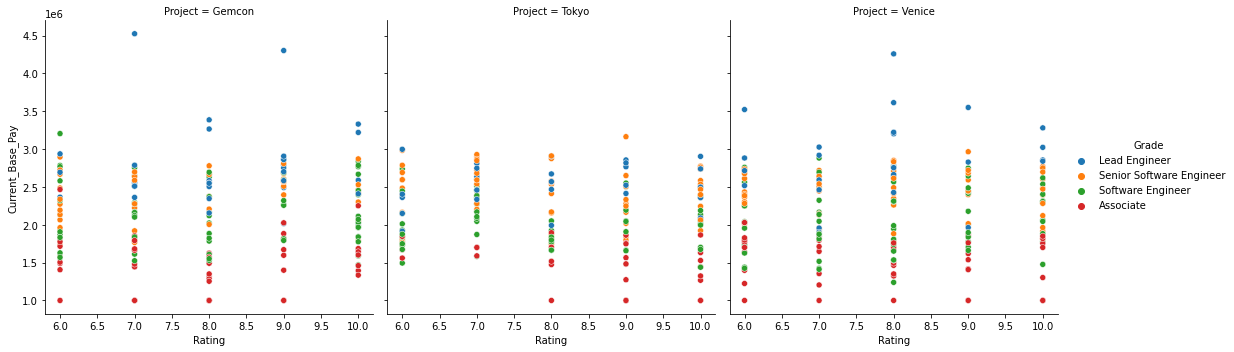

In [86]:
sns.relplot(x='Rating',y='Current_Base_Pay', col= 'Project',hue='Grade', data=df)